In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import seaborn as sns


data = pd.read_csv('data/Albuquerque_Final_2022-06-18.csv')

data.head()


,most_recent_observation,most_recent_observation_type,common_name,scientific_name,city,state,longitude_coordinate,latitude_coordinate,address,condition,...,retired_date,location_type,zipcode,neighborhood,location_name,ward,district,overhead_utility,diameter_breast_height_CM,percent_population
0,6/17/2020,inventory_date,Locust,NaN,Albuquerque,New Mexico,-106.568366,35.060456,NaN,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6/9/2020,inventory_date,Oak,Quercus,Albuquerque,New Mexico,-106.655037,35.139272,1641 Tierra Del Rio Northwest,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6/3/2020,inventory_date,Ash,Fraxinus,Albuquerque,New Mexico,-106.581127,35.052176,Us Veterans Hospital Loop,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/2020,inventory_date,Scotch pine,Pinus sylvestris,Albuquerque,New Mexico,-106.575056,35.052450,1606 San Pedro Drive Southeast,dead/dying,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/29/2020,inventory_date,Honeylocust,Gleditsia triacanthos,Albuquerque,New Mexico,-106.716539,35.149632,5700 Bogart Street Northwest,good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [153]:
# one hot tree types
tree_types  = pd.get_dummies(data['common_name'])

# convert condition to numerical
condition = data['condition'].replace({'excellent': 0, 'good': 1, 'fair': 2, 'poor': 3, 'dead/dying': 4})

# one hot native column
native = pd.get_dummies(data['native'])

# create new dataframe with latitude and longitude, tree_types, native, and condition
all_data = pd.concat([data[['longitude_coordinate', 'latitude_coordinate']], 
                      tree_types, 
                      native, 
                      condition], 
                      axis=1)

# drop no_info column
all_data = all_data.drop(columns=['no_info'])

# drop rows the NaN values for condition
all_data = all_data.dropna()

all_data.head()



,longitude_coordinate,latitude_coordinate,Afghan pine,American basswood,American elm,American holly,Amur maple,Apple,Apricot,Arizona cypress,...,Silver maple,Spruce,Texas red oak,Tree of heaven,Velvet ash arizona ash,Vitex,White ash,introduced,naturally_occurring,condition
0,-106.568366,35.060456,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
2,-106.581127,35.052176,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
3,-106.575056,35.052450,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
4,-106.716539,35.149632,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
5,-106.716640,35.149744,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0


In [154]:
# split data back into x and y
x_data = all_data.drop(['condition'], axis=1)
y_data = all_data['condition']

In [155]:
# # standardize x_data
# scaler = StandardScaler()
# x_data = scaler.fit_transform(x_data)

In [156]:
# split into train and test
train_data, test_data = train_test_split(all_data, test_size=0.2, random_state=25)

In [157]:
# split into x and y
x_train = train_data.drop(['condition'], axis=1)
y_train = train_data['condition']
x_test = test_data.drop(['condition'], axis=1)
y_test = test_data['condition']

x_train.head()

,longitude_coordinate,latitude_coordinate,Afghan pine,American basswood,American elm,American holly,Amur maple,Apple,Apricot,Arizona cypress,...,Siberian elm,Silver maple,Spruce,Texas red oak,Tree of heaven,Velvet ash arizona ash,Vitex,White ash,introduced,naturally_occurring
2510,-106.630295,35.086475,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1228,-106.665714,35.096847,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
772,-106.665591,35.088275,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2272,-106.561770,35.127569,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
425,-106.537858,35.113420,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [158]:
# x_train = train_data.iloc
# y_train = train_data.iloc[:,-5:]
# x_test = test_data.iloc[:, 0:-5]
# y_test = test_data.iloc[:,-5:]

In [159]:
print(y_test)

2380    1.0
811     1.0
173     2.0
535     3.0
183     2.0
       ... 
2479    2.0
1394    1.0
2112    1.0
1949    1.0
844     0.0
Name: condition, Length: 474, dtype: float64


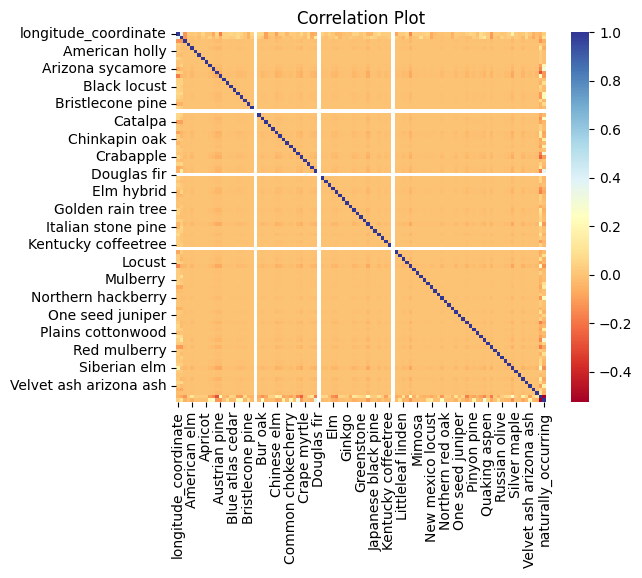

In [160]:
# compute correlation matrix
corr_df = x_train
cor = corr_df.corr(method='pearson') 
# print(cor)

# Plot
fig_corr, ax_corr =plt.subplots()
plt.title("Correlation Plot")
sns.heatmap(cor, cmap=plt.cm.RdYlBu, square=True, ax=ax_corr)
plt.show()


[[ 1.66850875e-01  4.81389521e-01 -2.08072916e-01 -1.23237456e-02
  -1.75897726e-01 -1.23240505e-02 -1.25123105e-02 -2.60631838e-02
  -1.22298975e-02 -1.43142718e-01  9.55985658e-02 -6.31570617e-01
  -6.53983514e-01 -1.02936501e-02  5.76057906e-01 -7.87772178e-02
  -3.63951615e-02  4.21654156e-01 -1.89866222e-01 -1.29715294e-01
  -1.98928719e-02 -3.09303293e-02  0.00000000e+00 -8.30869464e-02
   5.36931089e-01 -1.06811489e-01 -4.71123950e-02 -5.11015480e-02
   8.66316861e-02 -2.37787682e-01 -1.04271409e-01 -4.99424759e-02
  -1.24468736e-01 -1.02097290e-02  2.01624519e-02  7.90451281e-01
  -1.00926495e-02  1.29473183e-01  2.68812173e-01 -2.24458437e-01
   0.00000000e+00 -9.86706216e-02 -8.76035970e-02 -1.02569688e-02
  -2.48806839e-01  5.57295083e-01 -6.10569843e-02  1.44837205e-01
  -1.21945316e-02 -6.95974366e-02 -3.93725429e-01  1.49981265e-03
   1.33084341e-01 -4.77731045e-02 -3.10574107e-01 -3.83992734e-02
   1.94235827e-01  3.07981262e-01 -1.23600821e-02 -1.34480730e-01
   3.46416

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


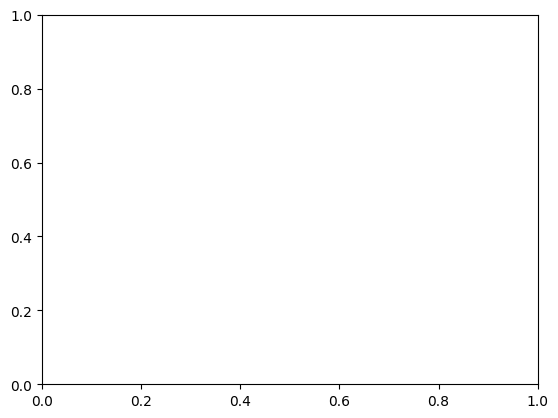

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x_train= x_train.to_numpy()
x_test = x_test.to_numpy()
# y_train = y_train.astype('int64')


theta = LogisticRegression(penalty='l2', C=1)
theta.fit(x_train, y_train)
coeff = theta.coef_
print(coeff)
threshold = 0.5
y_pred_lg = (theta.predict(x_test)) #> threshold).astype(int)
#y_test = y_test*1
# y_test = y_test.astype('int64')


acc_lg = accuracy_score(y_test, y_pred_lg)
print("Accuracy LG : ", acc_lg)

fig2, ax2 = plt.subplots()

# Add decision boundary color map

# DecisionBoundaryDisplay.from_estimator(
#     theta,
#     x_test,
#     cmap=plt.cm.RdYlBu,
#     response_method="predict",
#     grid_resolution=200,
#     ax=ax2,
#     alpha=0.4,
#     xlabel=features[0],
#     ylabel=features[1],
# )
# # Add scatter plot and title
# ax2.scatter(X_test_lg[:, 0], X_test_lg[:, 1], c=y_test, cmap=plt.cm.RdYlBu)
# ax2.set_title("Decision boundary Logistic Regression")
